In this notebook I analyze the computer (level 1) performance against humans. 

In [174]:
import numpy as np
import random as random
import scipy
#using simpleguitk for display, is not needed for computer game
import simpleguitk as simplegui
import time
#new ones
import pandas as pd
from xgboost import XGBRegressor
import os
#skyjo game classes and functions
from skyjo_functions4 import *
#own functions for machine learning
from ml_functions2 import *
#for plotting 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [175]:
myPath='/home/tobias/ml-testing/games/skyjo'
list_input_files=[f for f in os.listdir(myPath) 
    if f.startswith('human_computer1_') and os.path.isfile(os.path.join(myPath, f))]
list_input_files.sort()
print(list_input_files)

['human_computer1_001.txt', 'human_computer1_002.txt', 'human_computer1_003.txt', 'human_computer1_004.txt', 'human_computer1_005.txt', 'human_computer1_006.txt', 'human_computer1_007.txt', 'human_computer1_008.txt', 'human_computer1_009.txt', 'human_computer1_010.txt', 'human_computer1_011.txt', 'human_computer1_012.txt', 'human_computer1_013.txt', 'human_computer1_014.txt', 'human_computer1_015.txt', 'human_computer1_016.txt', 'human_computer1_017.txt', 'human_computer1_018.txt', 'human_computer1_019.txt', 'human_computer1_020.txt', 'human_computer1_021.txt', 'human_computer1_022.txt', 'human_computer1_023.txt', 'human_computer1_024.txt', 'human_computer1_025.txt', 'human_computer1_026.txt', 'human_computer1_027.txt', 'human_computer1_028.txt', 'human_computer1_029.txt', 'human_computer1_030.txt', 'human_computer1_031.txt', 'human_computer1_032.txt', 'human_computer1_033.txt', 'human_computer1_034.txt', 'human_computer1_035.txt', 'human_computer1_036.txt', 'human_computer1_037.txt', 

In [176]:
res=np.zeros((7,len(list_input_files)))
deltahuman=0
deltacomputer=0
#list of results, currect ones need to 
listf=[]
for i in range(len(list_input_files)):
    file=np.loadtxt(list_input_files[i])   
    #get previous also to check that it is doe snot include also old input
    if i>0:
        ofile=np.loadtxt(list_input_files[i-1])  
        #append all if equal besides score or beyound game 50
        if sum(np.round(ofile[0:49,0]))!=sum(np.round(file[0:49,0])) or i>50:
            #add round number here 
            finfile=np.zeros((file.shape[0]+1,file.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file
            finfile[file.shape[0],:file.shape[1]]=i
            listf.append(finfile)
        else:
            #otherwise only append the difference
            finfile=np.zeros((file.shape[0]+1,file.shape[1]-ofile.shape[1]))
            finfile[:file.shape[0],:file.shape[1]]=file[:,ofile.shape[1]:file.shape[1]]
            finfile[file.shape[0],:file.shape[1]]=i
            #chnage round number in it
            finfile[48]=range(finfile.shape[1])
            listf.append(finfile)
            #could add rounds from end, but better not since not possible in reality
    else:
        finfile=np.zeros((file.shape[0]+1,file.shape[1]))
        finfile[:file.shape[0],:file.shape[1]]=file
        finfile[file.shape[0],:file.shape[1]]=i
        listf.append(finfile)
    res[0,i]=i+1
    #number of turns is overall not set zero for new game from game 50 correct
    res[4,i]=subfile.shape[1]
    #start player #does not change in new game also from game 50 correct
    res[5,i]=subfile[0,0]

    #start player #does not change in new game also from game 50 correct
    res[5,i]=file[0,0]
    #last player
    res[6,i]=file[0,file.shape[1]-1]
    #always player 0, human first 
    if file[0,0]==0:
        res[1:3,i]=file[49:51,0]
    else:
        res[1,i]=file[50,0]
        res[2,i]=file[49,0]
    if res[1,i]<res[2,i]:
        #human winner mark
        res[3,i]=1
        #to calculate by how much a  human wins in average 
        deltahuman+=(res[2,i]-res[1,i])
    else:
        deltacomputer+=(res[1,i]-res[2,i])

#print array
#the longest length of 78 was when i tested the vanihsing cards on purpose
print(res.T)        
#print number of elements in list
print(len(listf))

[[  1.  24.  46.   1.  29.   0.   1.]
 [  2.  36.   9.   0.  29.   0.   1.]
 [  3.  78.  24.   0.  29.   1.   1.]
 [  4.  11.  49.   1.  29.   0.   1.]
 [  5.   9.  22.   1.  29.   0.   1.]
 [  6.  13.  28.   1.  29.   1.   1.]
 [  7.   9.  19.   1.  29.   1.   1.]
 [  8.  10.  30.   1.  29.   1.   1.]
 [  9.  32.   8.   0.  29.   1.   1.]
 [ 10.  20.  24.   1.  29.   1.   1.]
 [ 11.  22.  34.   1.  29.   0.   1.]
 [ 12.  17.  41.   1.  29.   0.   1.]
 [ 13.  27.  29.   1.  29.   0.   1.]
 [ 14.  46.  15.   0.  29.   0.   1.]
 [ 15.  11.  23.   1.  29.   0.   1.]
 [ 16.  12.  36.   1.  29.   0.   1.]
 [ 17.  16.  22.   1.  29.   1.   1.]
 [ 18.  36.   4.   0.  29.   1.   1.]
 [ 19.  19.  28.   1.  29.   1.   1.]
 [ 20.  18.  32.   1.  29.   1.   1.]
 [ 21.  26.  13.   0.  29.   1.   1.]
 [ 22.  10.  55.   1.  29.   1.   1.]
 [ 23.  28.  41.   1.  29.   1.   1.]
 [ 24.  20.  65.   1.  29.   1.   1.]
 [ 25.  29.  39.   1.  29.   1.   1.]
 [ 26.  35.  45.   1.  29.   1.   1.]
 [ 27.  24. 

In [177]:
#convert lists of differnet lengths consistent of different arrays of same shape[0] but different shape[1]
def lists_arrays_to_one(listf,int2=True):
    #determine length of output
    c=0
    for i in range(len(listf)):
        c+=listf[i].shape[1]
        #create array
    ar=np.zeros((listf[0].shape[0],c))   
    c=0
    #now fill it
    for i in range(len(listf)):
        if int2==True:
            ar[:,c:c+listf[i].shape[1]]=np.round(listf[i])
        else:
            ar[:,c:c+listf[i].shape[1]]=np.round(listf[i])
        c+=listf[i].shape[1]
    return ar     

In [178]:
ar=lists_arrays_to_one(listf)
print(ar.shape)

(52, 2205)


In [179]:
print(f"the human won {int(sum(res[3]))} times of {res.shape[1]} rounds")

print(f"the human average is {round(np.mean(res[1]),3)} points")
                       
print(f"the computer average is {round(np.mean(res[2]),3)} points")
print(f"the human average adventage is  {round(np.mean(res[2]-res[1]),3)} points")
print(f"the human wins to {round(np.mean(res[3]*100),1)} %")

the human won 56 times of 69 rounds
the human average is 24.159 points
the computer average is 33.13 points
the human average adventage is  8.971 points
the human wins to 81.2 %


In [180]:
#average win is by to be determine deltapoints
print(f"human average adventage {round(deltahuman/sum(res[3]),3)} points")
print(f"computer average adventage {round(deltacomputer/(res.shape[1]-sum(res[3])),3)} points")

human average adventage 18.464 points
computer average adventage 31.923 points


In [181]:
#name of columns
columns=['acting_player']
columns.append('open_pile_card')
for i in range(15):
    columns.append('number_of_'+str(i-2)+'_in_open')
columns.append('number_of_cards_in_closed')
for i in range(12):
    columns.append('own_cards_'+str(i))
for i in range(12):
    columns.append('other_player_cards_'+str(i))    
columns.append('action_take_open')
columns.append('action_discard')
columns.append('discard_value')
columns.append('id_player_card')
columns.append('numeric_player_card') 
columns.append('vanish_marker')
columns.append('turn')
columns.append('score_self')
columns.append('score_other')
columns.append('round_number')
print(len(columns),columns)
for i in range(43,52):
    print(i)
    print(columns[i],ar[i])

52 ['acting_player', 'open_pile_card', 'number_of_-2_in_open', 'number_of_-1_in_open', 'number_of_0_in_open', 'number_of_1_in_open', 'number_of_2_in_open', 'number_of_3_in_open', 'number_of_4_in_open', 'number_of_5_in_open', 'number_of_6_in_open', 'number_of_7_in_open', 'number_of_8_in_open', 'number_of_9_in_open', 'number_of_10_in_open', 'number_of_11_in_open', 'number_of_12_in_open', 'number_of_cards_in_closed', 'own_cards_0', 'own_cards_1', 'own_cards_2', 'own_cards_3', 'own_cards_4', 'own_cards_5', 'own_cards_6', 'own_cards_7', 'own_cards_8', 'own_cards_9', 'own_cards_10', 'own_cards_11', 'other_player_cards_0', 'other_player_cards_1', 'other_player_cards_2', 'other_player_cards_3', 'other_player_cards_4', 'other_player_cards_5', 'other_player_cards_6', 'other_player_cards_7', 'other_player_cards_8', 'other_player_cards_9', 'other_player_cards_10', 'other_player_cards_11', 'action_take_open', 'action_discard', 'discard_value', 'id_player_card', 'numeric_player_card', 'vanish_marker

In [182]:
#create data frame 
df = pd.DataFrame(data = ar.T, index=range(ar.shape[1]),columns = columns)
print(df.head())

   acting_player  open_pile_card  number_of_-2_in_open  number_of_-1_in_open  \
0            0.0             4.0                   0.0                   0.0   
1            1.0             5.0                   0.0                   0.0   
2            0.0            -1.0                   0.0                   0.0   
3            1.0             8.0                   0.0                   0.0   
4            0.0             2.0                   0.0                   0.0   

   number_of_0_in_open  number_of_1_in_open  number_of_2_in_open  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   number_of_3_in_open  number_of_4_in_open  number_of_5_in_open  ...  \
0                  0.0               

Text(0, 0.5, 'human score-computer score [points]')

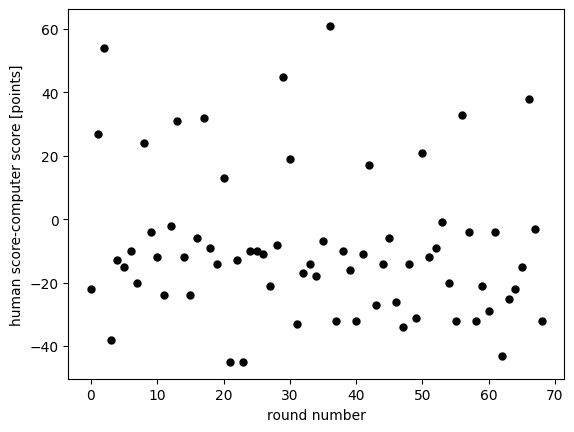

In [183]:
#slect only human
df2=df[df.acting_player==0].groupby(df.round_number).max()
plt.plot(df2.round_number,df2.score_self-df2.score_other,'o',ms=5,color='black') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("round number")
plt.ylabel("human score-computer score [points]")

In the results above it is visible that the human wins (or below 0) partly with only a small adventage while that never happends for then computer. That is because the computer finhss first, when the computer win he has no only the lowest number of points but also the points of the human are doubled causing that there is a gap just over zero. 

Text(0.5, 0, 'human score-computer score [points]')

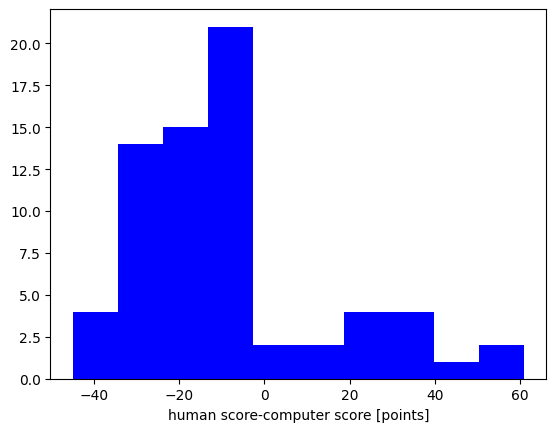

In [184]:
#df2.score_self.plot(kind='hist')
#df2.score_other.plot(kind='hist')
plt.hist(df2.score_self-df2.score_other,color='blue') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("number of occurancies")
plt.xlabel("human score-computer score [points]")

In [185]:
#columns used in model 
level1_2players_columns=np.loadtxt("xgb_model1_column2.txt")
#the score columns need to be marked back 
sel1=np.copy(level1_2players_columns)
#the score columns set to 1 since need to be output
sel1[49:51]=1

#model file needed to run (is in included in function library not needed here but is so more visible) 
level1_2players_model = XGBRegressor()
level1_2players_model.load_model("xgb_model2.json")
print(len(level1_2players_columns),sum(level1_2players_columns))
#get prediction
for_xgb=np.zeros((int(sum(level1_2players_columns)),df.shape[0]))
counter=0
for i in range(len(level1_2players_columns)):
    if level1_2players_columns[i]==1:
        for_xgb[counter]=df.iloc[:,i]
        counter+=1
print(counter)   
print(for_xgb.shape)
print(for_xgb)

51 30.0
30
(30, 2205)
[[ 4.  5. -1. ...  7.  0. -1.]
 [20. -1. 20. ...  1. 20.  1.]
 [20. 20. 20. ...  0. 30.  0.]
 ...
 [30.  2. 30. ...  0. 30. 30.]
 [ 4.  0.  7. ...  3.  0.  2.]
 [ 5. -1.  8. ...  0. 20.  2.]]


In [186]:
res=level1_2players_model.predict(for_xgb.T)

In [187]:
print(res)

[ 8.182078  -9.972565  -1.5169258 ... -5.0817165  5.0532537 -8.627794 ]


Text(0, 0.5, 'predicted  human score-computer score')

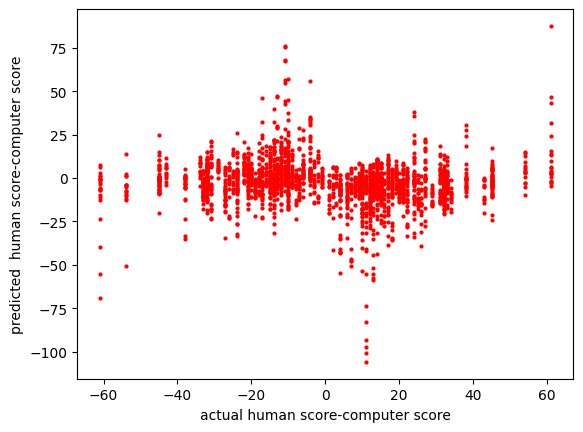

In [188]:
plt.plot( df.score_self-df.score_other,res,'o',ms=2,color='red') 
#plt.plot(df.round[0],df.score_self-df.score_other,'v',ms=5,color='black',label='train one turn max_depth=4') 
#plt.legend(loc="best")
plt.xscale("linear")
#plt.ylim(55,65)
plt.xlabel("actual human score-computer score")
plt.ylabel("predicted  human score-computer score")

In [190]:
print(np.std(df.score_self-df.score_other))
print(np.std(res))
print(np.std(res-df.score_self+df.score_other))
#add median deviation or something like that 
print(scipy.stats.median_abs_deviation(df.score_self-df.score_other))
print(scipy.stats.median_abs_deviation(res))
print(scipy.stats.median_abs_deviation(res-df.score_self-df.score_other))
print((18**2-6**2)**0.5)

24.404376561675832
13.514308
29.119638943157483
18.0
5.990106105804443
14.87537431716919
16.97056274847714


The prediction is rather bad subtracting it from the score increase the standard deviation instead to decrease it as when it worked as it is the case on computer data. The median deviation looks better, there the deviation reduvces, thus just a few cases are really badly predicted. Still it is possible that using human data more directly is a better strategy.

Other ideas use both xgb (old type and more feature engeering on it, change to vanished card n explict feature, likely small N cause a problem) for the next iteration. deep learning only if it is better on the training data.

If that does not decrease predictions, then train on human data, more simple model needed, maybe xgb or linear with good features. 